In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
import pandas as pd     # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np      # linear algebra
import matplotlib.pyplot as plt
from sklearn import linear_model

## Import Dataset 


In [6]:
!ls "/content/drive/My Drive/Colab Notebooks/Home Pricing Basic"
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Home Pricing Basic/prices.csv")
df

HomePricing-Basic.ipynb  prices.csv


,area,price
0,2500,550000
1,3000,650000
2,3200,750000
3,3650,810000
4,3900,830000
5,4100,850000


## Visualizing Data

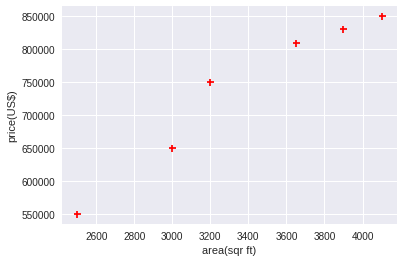

In [7]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area, df.price, color='red', marker='+')

## Training Model

In [9]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Predict Price

In [15]:
area = 3200
predict = reg.predict(area)
print('Price for {} area is : {}'.format(area, predict))

Price for 3200 area is : [703561.73833065]


In [30]:
coef = reg.coef_
intercept = reg.intercept_
print('Coefisient : {}'.format(coef))
print('Intercept : {}'.format(intercept))

Coefisient : [190.11266958]
Intercept : 95201.1956772


## Formula:
y = m * area + b

m = coefisient <br/> 
b = intercept

In [31]:
coef * area + intercept

array([703561.73833065])

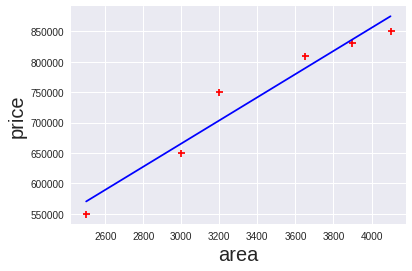

In [36]:
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

## Predict from CSV File

In [25]:
d = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Home Pricing Basic/house_area.csv')
d.head()

,area
0,2700
1,2900
2,3100
3,3650
4,3910


In [0]:
p = reg.predict(d)
d['price'] = p


In [27]:
d

,area,price
0,2700,608505.403541
1,2900,646527.937457
2,3100,684550.471373
3,3650,789112.439641
4,3910,838541.733732
5,4090,872762.014256
6,2040,483031.041619
7,3750,808123.706599
8,3760,810024.833295


### Save prediction to csv

In [0]:
d.to_csv("prediction_result.csv", index=False)